## **ADAPTIVE NOISE REDUCTION SCHEME FOR SALT AND PEPPER**

In [12]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [13]:
# read image
img = cv2.imread("/content/IMG_2678.JPG")

In [14]:
# convert to RGB
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

(np.float64(-0.5), np.float64(3023.5), np.float64(4031.5), np.float64(-0.5))

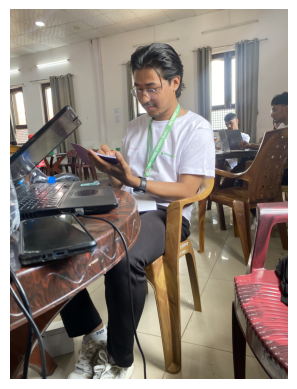

In [31]:
# Display image
plt.imshow(img_rgb)
plt.axis("off")

In [16]:
img.shape

(4032, 3024, 3)

In [17]:
# convert to gray scale
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

(np.float64(-0.5), np.float64(3023.5), np.float64(4031.5), np.float64(-0.5))

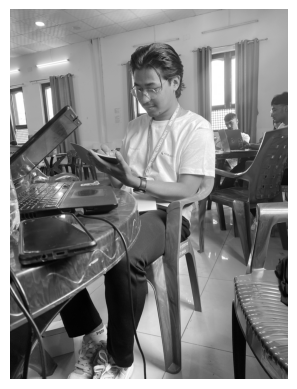

In [32]:
plt.imshow(img_gray, cmap="gray")
plt.axis("off")

In [19]:
# salt and pepper noise add
def add_sp_noise(image, percent):
  amount = percent # % of pixel to be alter
  salt = int(amount * image.size * 0.5)  # half for salt
  pepper = int(amount * image.size * 0.5) # half for pepper

  for _ in range(salt):
    x = np.random.randint(0, image.shape[0]-1)
    y = np.random.randint(0, image.shape[1]-1)

    image[x,y] = 255

  for _ in range(pepper):
    x = np.random.randint(0, image.shape[0]-1)
    y = np.random.randint(0, image.shape[1]-1)

    image[x,y] = 0

  return image

In [20]:
noisy_image = img_gray.copy()
noisy_image = add_sp_noise(noisy_image, 0.5)

(np.float64(-0.5), np.float64(3023.5), np.float64(4031.5), np.float64(-0.5))

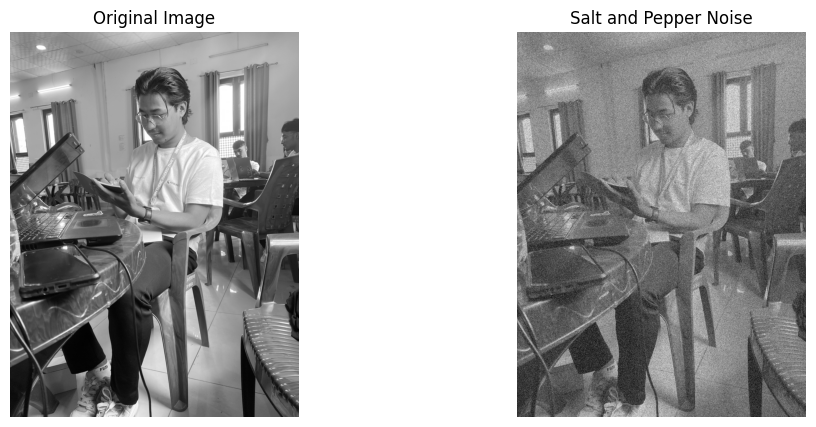

In [21]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.imshow(img_gray, cmap='gray')
plt.title("Original Image")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(noisy_image, cmap='gray')
plt.title("Salt and Pepper Noise")
plt.axis('off')

In [22]:
# restoring using Adaptive noise reduction
# calculate mean absolute gradient

def MAG(image, i, j ):
  window = image[i-1:i+2, j-1:j+2].flatten()
  center = window[4]
  neighbors = np.delete(window, 4)
  return np.mean(np.abs(neighbors - center))

# adaptive filter
def adaptive_filter(image, thresold=20):
  img_padded = np.pad(img_gray, 1, mode='reflect')
  filtered_img = image.copy()

  for i in range(1, filtered_img.shape[0]+1):
    for j in range(1, filtered_img.shape[1]+1):

      mag = MAG(img_padded, i, j )

      if mag > thresold:

        window = img_padded[i-1:i+2, j-1: j+2].flatten()

        closest_5_idx = [4, 1, 3, 5, 7]
        others_idx = [0, 2, 6, 8]

        closest_5 = np.sort(window[closest_5_idx])
        a2 = np.median(closest_5)

        combined = np.sort(np.append(a2, window[others_idx]))
        b3 = np.median(combined)
        filtered_img[i-1, j-1] = b3

      else:
         # Not noisy, keep original
         filtered_img[i-1, j-1] = image[i-1, j-1]

  return filtered_img



In [23]:
img_dup = adaptive_filter(noisy_image)

(np.float64(-0.5), np.float64(3023.5), np.float64(4031.5), np.float64(-0.5))

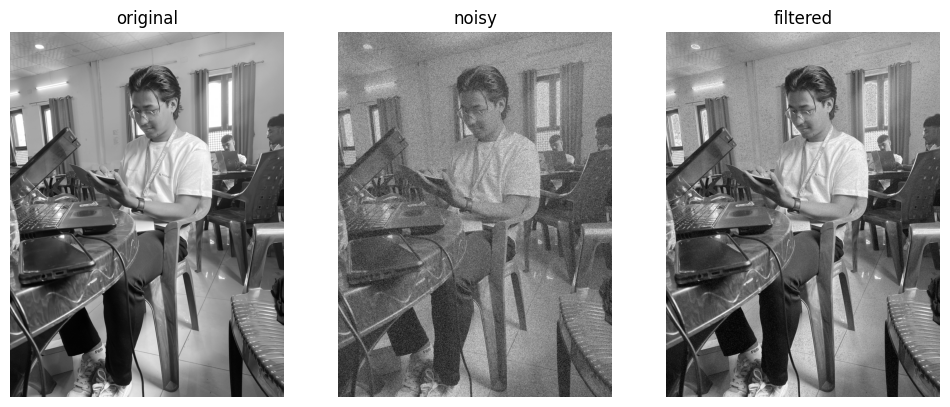

In [27]:
plt.figure(figsize=(12,8))
plt.subplot(1, 3, 1)
plt.imshow(img_gray, cmap="gray")
plt.title("original")
plt.axis("off")


plt.subplot(1,3,2)
plt.imshow(noisy_image, cmap="gray")
plt.title("noisy")
plt.axis("off")


plt.subplot(1, 3, 3)
plt.imshow(img_dup, cmap="gray")
plt.title("filtered")
plt.axis("off")



In [28]:
# conditional image enhancement

def compute_std(image):
    mean = np.mean(image)
    std = np.sqrt(np.mean((image - mean) ** 2))
    return std

def conditional_enhancement(image, T = 20):
    img_padded = np.pad(image, 1, mode='reflect')
    enhanced_img = image.copy()

    std = compute_std(enhanced_img)

    if std <= T:
      print("Skiping Directional filtering")
      return enhanced_img


    print("applying directional filtering")
    for i in range( 1, enhanced_img.shape[0]+1):
        for j in range(1, enhanced_img.shape[1]+1):
            X = img_padded[i-1:i+2, j-1:j+2].flatten()

            Y1 = [X[0], X[1], X[3]]
            Y2 = [X[1], X[2], X[5]]
            Y3 = [X[3], X[6], X[7]]
            Y4 = [X[5], X[7], X[8]]

            avg = (np.mean(Y1) + np.mean(Y2) + np.mean(Y3) + np.mean(Y4)) / 4

            enhanced_img[i-1,j-1] = avg

    return enhanced_img



In [29]:
enhanced_img = conditional_enhancement(img_dup)

applying directional filtering


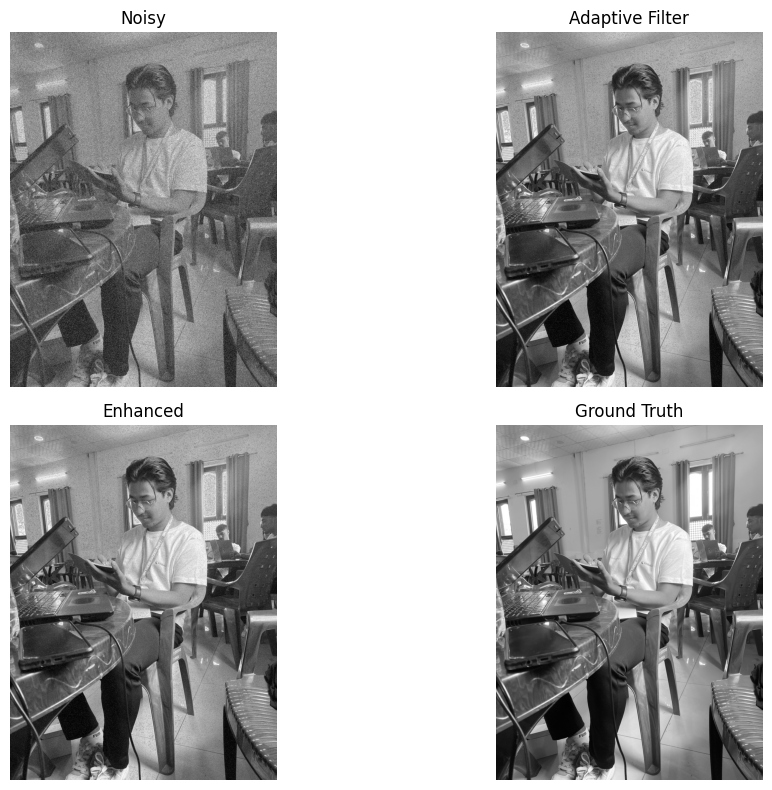

In [34]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.imshow(noisy_image, cmap="gray")
plt.title("Noisy")
plt.axis("off")

plt.subplot(2, 2, 2)
plt.imshow(img_dup, cmap="gray")
plt.title("Adaptive Filter")
plt.axis("off")

plt.subplot(2, 2, 3)
plt.imshow(enhanced_img, cmap="gray")
plt.title("Enhanced")
plt.axis("off")

plt.subplot(2, 2, 4)
plt.imshow(img_gray, cmap="gray")
plt.title("Ground Truth")
plt.axis("off")

plt.tight_layout()
plt.show()


(np.float64(-0.5), np.float64(3023.5), np.float64(4031.5), np.float64(-0.5))

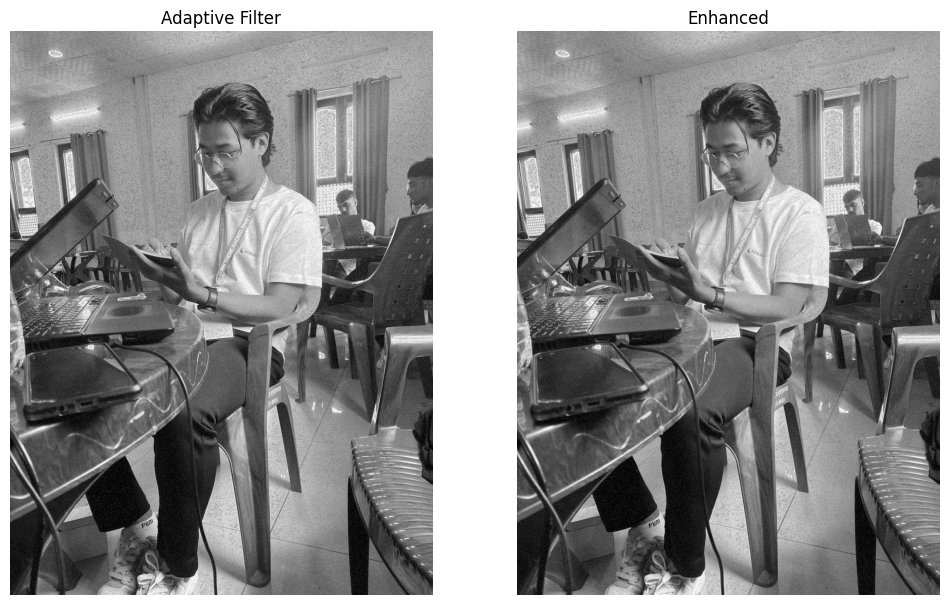

In [50]:

plt.figure(figsize = (12,8))
plt.subplot(1, 2, 1)
plt.imshow(img_dup, cmap="gray")
plt.title("Adaptive Filter")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(enhanced_img, cmap="gray")
plt.title("Enhanced")
plt.axis("off")